In [1]:
import atlite
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs
from cartopy.crs import PlateCarree as plate
import cartopy.io.shapereader as shpreader
from matplotlib.gridspec import GridSpec
import seaborn as sns
import geopandas as gpd

SyntaxError: expected ':' (convert.py, line 553)

In [3]:
import logging
logging.basicConfig(level=logging.INFO)

In [42]:
cutout = atlite.Cutout(path="western-europe-2011-01.nc",
                       module="era5",
                       x=slice(-13.6913, 1.7712),
                       y=slice(49.9096, 60.8479),
                       time="2011-01",
                       #features = ["wave_height"]
                       )

c:\Users\felix\Documents\PythonScripts\atlitewec\atlite\cutout.py:187: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


In [43]:
cutout.available_features

module  feature    
era5    height                   height
        wind                    wnd100m
        wind                wnd_azimuth
        wind                  roughness
        influx               influx_toa
        influx            influx_direct
        influx           influx_diffuse
        influx                   albedo
        influx           solar_altitude
        influx            solar_azimuth
        temperature         temperature
        temperature    soil temperature
        runoff                   runoff
        wave_height         wave_height
        wave_period         wave_period
Name: variables, dtype: object

In [6]:
cutout.data.__getattr__

<bound method AttrAccessMixin.__getattr__ of <xarray.Dataset>
Dimensions:           (x: 62, y: 44, time: 744)
Coordinates:
  * x                 (x) float64 -13.5 -13.25 -13.0 -12.75 ... 1.25 1.5 1.75
  * y                 (y) float64 50.0 50.25 50.5 50.75 ... 60.25 60.5 60.75
  * time              (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
    lon               (x) float64 dask.array<chunksize=(62,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(44,), meta=np.ndarray>
Data variables: (12/15)
    height            (y, x) float32 dask.array<chunksize=(44, 62), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.n

In [7]:
cutout.prepare(
    #features = ['influx', 'temperature']

)

INFO:atlite.data:Cutout already prepared.


<Cutout "western-europe-2011-01">
 x = -13.50 ⟷ 1.75, dx = 0.25
 y = 50.00 ⟷ 60.75, dy = 0.25
 time = 2011-01-01 ⟷ 2011-01-31, dt = H
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff', 'wave_height', 'wave_period']

In [8]:
cutout.data

<xarray.Dataset>
Dimensions:           (x: 62, y: 44, time: 744)
Coordinates:
  * x                 (x) float64 -13.5 -13.25 -13.0 -12.75 ... 1.25 1.5 1.75
  * y                 (y) float64 50.0 50.25 50.5 50.75 ... 60.25 60.5 60.75
  * time              (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
    lon               (x) float64 dask.array<chunksize=(62,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(44,), meta=np.ndarray>
Data variables: (12/15)
    height            (y, x) float32 dask.array<chunksize=(44, 62), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    influx_direct     (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    ...                ...
    solar_azimuth     (time, y, x) float64 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    temperature       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    soil temperature  (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    runoff            (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wave_height       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wave_period       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['height', 'wind', 'temperature', 'influx', 'runoff',...
    chunksize_time:     100
    features:           wave_height
    Conventions:        CF-1.6
    history:            2022-03-18 13:31:49 GMT by grib_to_netcdf-2.24.2: /op...

NameError: name 'cutout' is not defined

In [91]:
cutout.data.data_vars #variables
#cutout.data.dims #dimensions
#ds.attrs #attributes of the variables

Data variables:
    height            (y, x) float32 dask.array<chunksize=(44, 62), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    influx_direct     (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    influx_diffuse    (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    albedo            (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    solar_altitude    (time, y, x) float64 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    solar_azimuth     (time, y, x) float64 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    temperature       (time, y, x) 

In [9]:
cutout.data.wave_height
cutout.data.wave_height[742] #taking first index, in this case time

<xarray.DataArray 'wave_height' (y: 44, x: 62)>
dask.array<getitem, shape=(44, 62), dtype=float32, chunksize=(44, 62), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -13.5 -13.25 -13.0 -12.75 -12.5 ... 1.0 1.25 1.5 1.75
  * y        (y) float64 50.0 50.25 50.5 50.75 51.0 ... 60.0 60.25 60.5 60.75
    time     datetime64[ns] 2011-01-31T22:00:00
    lon      (x) float64 dask.array<chunksize=(62,), meta=np.ndarray>
    lat      (y) float64 dask.array<chunksize=(44,), meta=np.ndarray>
Attributes:
    units:      m
    long_name:  Significant height of combined wind waves and swell
    module:     era5
    feature:    wave_height

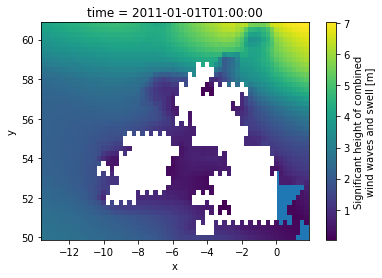

In [10]:
cutout.data.wave_height.plot()
cutout.data.wave_height[1].plot() #taking only on time
#cutout.data.wave_period.plot()

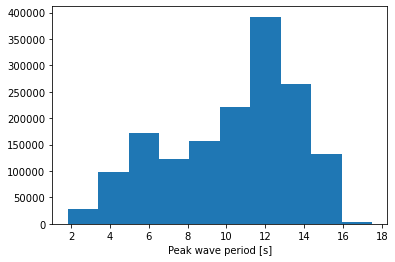

In [11]:
x =cutout.data.wave_height
y =cutout.data.wave_period.plot()

In [19]:
projection = ccrs.Orthographic(-10, 35)

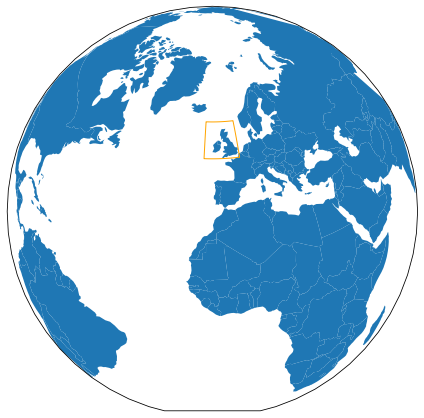

In [38]:
cells = cutout.grid
df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
country_bound = gpd.GeoSeries(cells.unary_union)

projection = ccrs.Orthographic(-10, 35)
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(6, 6))
df.plot(ax=ax, transform=plate())
country_bound.plot(ax=ax, edgecolor='orange',
                   facecolor='None', transform=plate())
fig.tight_layout()

INFO:atlite.convert:Convert and aggregate 'wind'.
C:\Users\felix\AppData\Local\Temp\ipykernel_19888\1285100158.py:9: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('white')


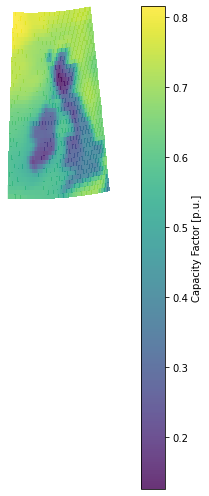

In [37]:
cap_factors= cutout.wind(turbine='Vestas_V112_3MW', capacity_factor=True)



fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(9, 7))
cap_factors.name = 'Capacity Factor'
cap_factors.plot(ax=ax, transform=plate(), alpha=0.8)
cells.plot(ax=ax)
ax.outline_patch.set_edgecolor('white')
fig.tight_layout();

In [99]:
cutout.data

<xarray.Dataset>
Dimensions:           (x: 62, y: 44, time: 744)
Coordinates:
  * x                 (x) float64 -13.5 -13.25 -13.0 -12.75 ... 1.25 1.5 1.75
  * y                 (y) float64 50.0 50.25 50.5 50.75 ... 60.25 60.5 60.75
  * time              (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
    lon               (x) float64 dask.array<chunksize=(62,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(44,), meta=np.ndarray>
Data variables: (12/15)
    height            (y, x) float32 dask.array<chunksize=(44, 62), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    influx_direct     (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    ...                ...
    solar_azimuth     (time, y, x) float64 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    temperature       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    soil temperature  (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    runoff            (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wave_height       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wave_period       (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['height', 'wind', 'temperature', 'influx', 'runoff',...
    chunksize_time:     100
    features:           wave_height
    Conventions:        CF-1.6
    history:            2022-03-18 13:31:49 GMT by grib_to_netcdf-2.24.2: /op...

In [97]:
cap_factors.dims

('y', 'x')

In [113]:
cutout.data.groupby("time.day")
daily_mean=cutout.data.groupby("time.week").mean()
daily_mean

C:\Users\felix\anaconda3\envs\pypsa-eur\lib\site-packages\xarray\core\accessor_dt.py:388: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(


<xarray.Dataset>
Dimensions:           (x: 62, y: 44, week: 6)
Coordinates:
  * x                 (x) float64 -13.5 -13.25 -13.0 -12.75 ... 1.25 1.5 1.75
  * y                 (y) float64 50.0 50.25 50.5 50.75 ... 60.25 60.5 60.75
    lon               (x) float64 dask.array<chunksize=(62,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(44,), meta=np.ndarray>
  * week              (week) int64 1 2 3 4 5 52
Data variables: (12/15)
    height            (week, y, x) float32 dask.array<chunksize=(1, 44, 62), meta=np.ndarray>
    wnd100m           (week, y, x) float32 dask.array<chunksize=(1, 44, 62), meta=np.ndarray>
    wnd_azimuth       (week, y, x) float32 dask.array<chunksize=(1, 44, 62), meta=np.ndarray>
    roughness         (week, y, x) float32 dask.array<chunksize=(1, 44, 62), meta=np.ndarray>
    influx_toa        (week, y, x) float32 dask.array<chunksize=(1, 44, 62), meta=np.ndarray>
    influx_direct     (week, y, x) float32 dask.array<chunksize=(1, 44, 62), meta=np.ndarray>
    ...                ...
    solar_azimuth     (week, y, x) float64 dask.array<chunksize=(1, 44, 62), meta=np.ndarray>
    temperature       (week, y, x) float32 dask.array<chunksize=(1, 44, 62), meta=np.ndarray>
    soil temperature  (week, y, x) float32 dask.array<chunksize=(1, 44, 62), meta=np.ndarray>
    runoff            (week, y, x) float32 dask.array<chunksize=(1, 44, 62), meta=np.ndarray>
    wave_height       (week, y, x) float32 dask.array<chunksize=(1, 44, 62), meta=np.ndarray>
    wave_period       (week, y, x) float32 dask.array<chunksize=(1, 44, 62), meta=np.ndarray>

<xarray.DataArray 'wave_height' (y: 44, x: 62)>
dask.array<getitem, shape=(44, 62), dtype=float32, chunksize=(44, 62), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -13.5 -13.25 -13.0 -12.75 -12.5 ... 1.0 1.25 1.5 1.75
  * y        (y) float64 50.0 50.25 50.5 50.75 51.0 ... 60.0 60.25 60.5 60.75
    lon      (x) float64 dask.array<chunksize=(62,), meta=np.ndarray>
    lat      (y) float64 dask.array<chunksize=(44,), meta=np.ndarray>
    week     int64 2


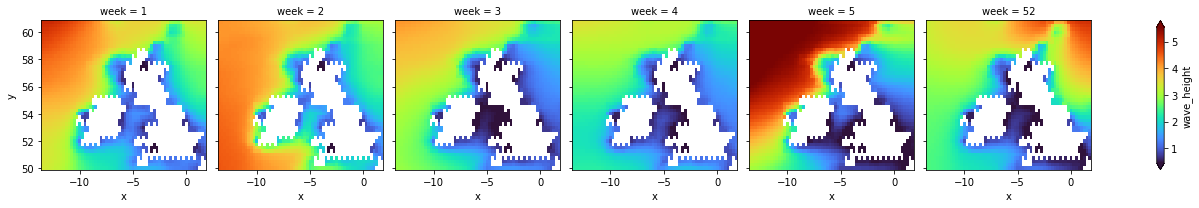

In [114]:
daily_mean.wave_height.plot(col="week", robust=True, cmap="turbo")
print(daily_mean.wave_height[1])

In [77]:
import atlite
from operator import itemgetter

### Getting data and calculating for wind

In [78]:
import atlite
from operator import itemgetter
import yaml
import xarray as xr
turbines ='./atlite/resources/windturbine/Vestas_V112_3MW.yaml'
with open(turbines, "r") as f:
        conf = yaml.safe_load(f)

In [79]:
import numpy as np

#Get_windconfig
turbine=dict(
        V=np.array(conf["V"]),
        POW=np.array(conf["POW"]),
        hub_height=conf["HUB_HEIGHT"],
        P=np.max(conf["POW"]),
    )



In [82]:
from atlite import wind as windm
# def convert_wind
ds = cutout.data #get the era5 cutout
V, POW, hub_height, P = itemgetter("V", "POW", "hub_height", "P")(turbine) #import wind config
wnd_hub = windm.extrapolate_wind_speed(ds, to_height=hub_height) #adjust Extrapolate the wind speed from a given height above ground to another

#Define interpolation fucntion
def _interpolate(da): 
        return np.interp(da, V, POW / P)

In [85]:
wnd_hub

<xarray.DataArray 'wnd80m' (time: 744, y: 44, x: 62)>
dask.array<mul, shape=(744, 44, 62), dtype=float32, chunksize=(100, 44, 62), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -13.5 -13.25 -13.0 -12.75 -12.5 ... 1.0 1.25 1.5 1.75
  * y        (y) float64 50.0 50.25 50.5 50.75 51.0 ... 60.0 60.25 60.5 60.75
  * time     (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
    lon      (x) float64 dask.array<chunksize=(62,), meta=np.ndarray>
    lat      (y) float64 dask.array<chunksize=(44,), meta=np.ndarray>
Attributes:
    long name:  extrapolated 80.0 m wind speed using logarithmic method with ...
    units:      m s**-1

In [47]:
import xarray as xr
da = xr.apply_ufunc(
    _interpolate,
    wnd_hub,
    input_core_dims=[[]],
    output_core_dims=[[]],
    output_dtypes=[wnd_hub.dtype],
    dask="parallelized",
)

## Return of convert_wind function

In [62]:
# Returns specific generation array in MWh/MWp
da.attrs["units"] = "MWh/MWp"
da = da.rename("specific generation")
da.values[0][0][0]

0.20720958709716797

In [85]:
# Calculation of capacity factor. Calculates mean over all time and renames it as capacity factor
#IF CAPACITY_FACTOR  = TRUE
res = da.mean("time").rename("Capacity Factor")
res.attrs["units"] = "p.u."
res[0][0]

<xarray.DataArray 'Capacity Factor' ()>
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    x        float64 -13.5
    y        float64 50.0
    lon      float64 dask.array<chunksize=(), meta=np.ndarray>
    lat      float64 dask.array<chunksize=(), meta=np.ndarray>
Attributes:
    units:    p.u.

In [14]:
from atlite import aggregate
import pandas as pd
matrix = None
index = pd.RangeIndex(matrix.shape[0])

results = aggregate.aggregate_matrix(da, matrix = None, index=None)

AttributeError: 'NoneType' object has no attribute 'shape'

In [15]:
wave = xr.merge([cutout.data.wave_height, cutout.data.wave_period])

wave

<xarray.Dataset>
Dimensions:      (x: 62, y: 44, time: 744)
Coordinates:
  * x            (x) float64 -13.5 -13.25 -13.0 -12.75 ... 1.0 1.25 1.5 1.75
  * y            (y) float64 50.0 50.25 50.5 50.75 ... 60.0 60.25 60.5 60.75
  * time         (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
    lon          (x) float64 dask.array<chunksize=(62,), meta=np.ndarray>
    lat          (y) float64 dask.array<chunksize=(44,), meta=np.ndarray>
Data variables:
    wave_height  (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
    wave_period  (time, y, x) float32 dask.array<chunksize=(100, 44, 62), meta=np.ndarray>
Attributes:
    units:      m
    long_name:  Significant height of combined wind waves and swell
    module:     era5
    feature:    wave_height

In [16]:
wave.dims
#wave.wave_height, 
wave.wave_height[0]

<xarray.DataArray 'wave_height' (y: 44, x: 62)>
dask.array<getitem, shape=(44, 62), dtype=float32, chunksize=(44, 62), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -13.5 -13.25 -13.0 -12.75 -12.5 ... 1.0 1.25 1.5 1.75
  * y        (y) float64 50.0 50.25 50.5 50.75 51.0 ... 60.0 60.25 60.5 60.75
    time     datetime64[ns] 2011-01-01
    lon      (x) float64 dask.array<chunksize=(62,), meta=np.ndarray>
    lat      (y) float64 dask.array<chunksize=(44,), meta=np.ndarray>
Attributes:
    units:      m
    long_name:  Significant height of combined wind waves and swell
    module:     era5
    feature:    wave_height

In [40]:
wave.wave_period.sel(x=-13.5, y = 50)

<xarray.DataArray 'wave_period' (time: 744)>
dask.array<getitem, shape=(744,), dtype=float32, chunksize=(100,), chunktype=numpy.ndarray>
Coordinates:
    x        float64 -13.5
    y        float64 50.0
  * time     (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
    lon      float64 dask.array<chunksize=(), meta=np.ndarray>
    lat      float64 dask.array<chunksize=(), meta=np.ndarray>
Attributes:
    units:      s
    long_name:  Peak wave period
    module:     era5
    feature:    wave_period

In [133]:
from xhistogram.xarray import histogram
h_bins = np.arange(-.25,1,0.5)
p_bins = np.arange(-0.25,18.75,0.5)


x=-13
y=50
hts = histogram(wave.wave_height.sel(x= x, y=y), wave.wave_period.sel(x= x, y=y), bins = [h_bins, p_bins])

In [114]:
x= wave.time.size
x

744

Text(0.5, 1.0, 'WEC device power matrix')

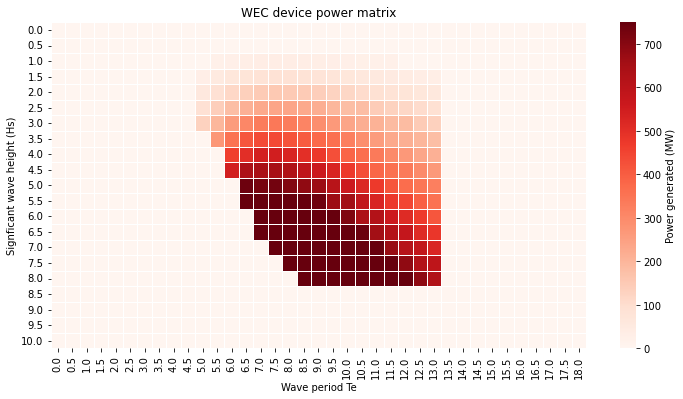

In [50]:
power_matrix = pd.read_excel("PowerMatrix_PyPsa.xlsx", header = 2, usecols= "C:AN", index_col=0)
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(power_matrix, 
            annot =False, 
            linewidths = 0.5, 
            ax=ax, 
            cmap = 'Reds', 
            cbar_kws = {'label':'Power generated (MW)'})
plt.xlabel ('Wave period Te')
plt.ylabel ('Signficant wave height (Hs)')
plt.title ('WEC device power matrix')

<xarray.DataArray 'histogram_wave_height_wave_period' (wave_height_bin: 21,
                                                       wave_period_bin: 37)>
dask.array<sum-aggregate, shape=(21, 37), dtype=int64, chunksize=(21, 37), chunktype=numpy.ndarray>
Coordinates:
  * wave_height_bin  (wave_height_bin) float64 0.0 0.5 1.0 1.5 ... 9.0 9.5 10.0
  * wave_period_bin  (wave_period_bin) float64 0.0 0.5 1.0 ... 17.0 17.5 18.0

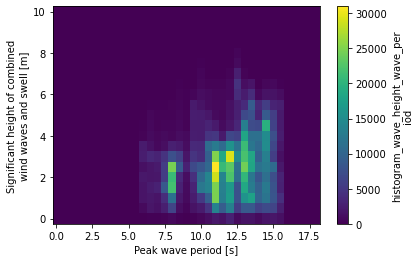

In [134]:
display(hts)
hts.plot()


In [106]:
hts.shape, power_matrix.shape

((21, 37), (21, 37))

In [107]:
hts.shape, power_matrix.shape
hts.values
hts_df=hts.to_pandas()
hts_df.index

Float64Index([ 0.0,  0.5,  1.0,  1.5,  2.0,  2.5,  3.0,  3.5,  4.0,  4.5,  5.0,
               5.5,  6.0,  6.5,  7.0,  7.5,  8.0,  8.5,  9.0,  9.5, 10.0],
             dtype='float64', name='wave_height_bin')

In [108]:
test= power_matrix*hts_df
test.shape

(21, 37)

Text(0.5, 1.0, 'WEC device power matrix')

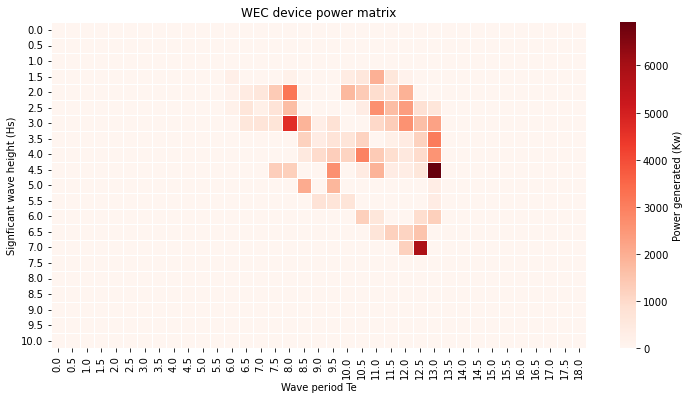

In [111]:

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(test, 
            annot =False, 
            linewidths = 0.5, 
            ax=ax, 
            cmap = 'Reds', 
            cbar_kws = {'label':'Power generated (Kw)'})
plt.xlabel ('Wave period Te')
plt.ylabel ('Signficant wave height (Hs)')
plt.title ('WEC device power matrix')

In [115]:
capacity_factor= test/(max(power_matrix)*x)

Text(0.5, 1.0, 'WEC device power matrix')

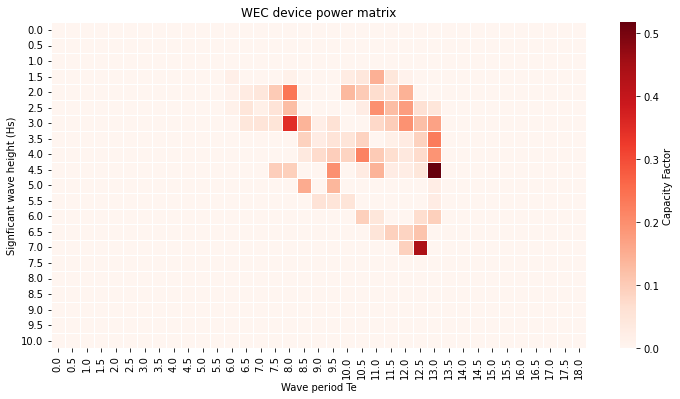

In [119]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(capacity_factor, 
            annot =False, 
            linewidths = 0.5, 
            ax=ax, 
            cmap = 'Reds', 
            cbar_kws = {'label':'Capacity Factor'})
plt.xlabel ('Wave period Te')
plt.ylabel ('Signficant wave height (Hs)')
plt.title ('WEC device power matrix')

In [132]:

capacity_avg=sum(capacity_factor)/capacity_factor.size
capacity_avg*100


42.857142857142854

In [26]:
nt, nx = 100, 30
da = xr.DataArray(np.random.randn(nt, nx), dims=['time', 'x'],
                  name='foo') # all inputs need a name

<xarray.DataArray 'foo' (time: 100, x: 30)>
array([[ 2.59491168,  2.16828997, -1.84758799, ..., -1.51869284,
         1.38049091,  0.68315616],
       [ 0.88502559,  0.89105694, -0.23066377, ..., -0.98171888,
        -0.32040051,  0.76730063],
       [-2.54641413,  0.0854761 ,  2.50028632, ..., -0.0984436 ,
         0.58687669, -1.79551562],
       ...,
       [-0.60092013,  0.27286727, -0.34431909, ...,  0.27277035,
         0.8129838 , -1.21952412],
       [ 1.19225247, -0.07606094,  0.16849761, ...,  0.32465026,
         0.23370538, -1.13080516],
       [-0.89246788,  0.83297977,  0.01818073, ..., -0.48191498,
        -0.24102461,  1.42821574]])
Dimensions without coordinates: time, x

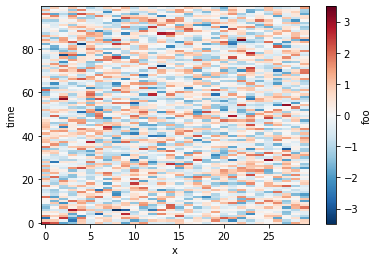

In [31]:
da.plot()